# Proyek Akhir - Sistem Rekomendasi

## Persiapan dan Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
import pandas as pd

anime = pd.read_csv('/content/drive/MyDrive/Stuff/Dicoding/ML_Terapan/rekomendasi/anime.csv')
rating = pd.read_csv('/content/drive/MyDrive/Stuff/Dicoding/ML_Terapan/rekomendasi/rating.csv')


In [3]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


Dataset didapatkan dari https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database/data.

Dataset terdiri dari dua file csv yaitu :
- anime.csv
- rating.csv

## Data Understanding

### Deskripsi Data

In [5]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [52]:
print(rating['user_id'].nunique())

73515


Dari kedua file csv, didapatkan 12294 jumlah anime yang tercatat pada file anime.csv dan 7813737 jumlah rating yang diberikan pengguna pada file rating.csv, dimana terdapat 73515 pengguna unik yang memberikan rating.

### Deskripsi variabel

Terdapat 7 variabel pada file anime.csv dan 3 variabel pada file rating.csv

Berikut penjelasan setiap variabel pada dataset
- anime.csv
  - anime_id : Nomer ID yang digunakan website myanimelist.net untuk mengidentifikasi suatu anime.
  - name : Judul anime.
  - genre : Genre dari anime, berbentuk list yang berisi beberapa genre.
  - type : Tipe format dari anime (movie, TV, OVA, dan lain lain.).
  - episodes : Jumlah episode.
  - rating : Rating keseluruhan pada website myanimelist.net (Dari nilai 0 hingga 10).
  - members : Jumlah pengikut pada halaman anime tersebut di website myanimelist.net.

- rating.csv
  - user_id : Nomor id yang digunakan untuk mengidentifikasi user.
  - anime_id : Nomer ID yang digunakan website myanimelist.net untuk mengidentifikasi suatu anime.
  - rating : Rating yang diberikan pengguna pada suatu anime. Nilainya 0 hingga 10, dan -1 apabila user telah menonton, tetapi tidak memberikan rating.

### Data Analysis

Proses analisis data akan dilakukan menggunakan teknik *univariate data analysis*, yaitu teknik menganalisis data yang berfokus pada satu variabel pada satu waktu.

#### Data Kategori

10 Genre Anime Terbanyak pada Dataset :
            Genre  Jumlah
0          Comedy    4645
1          Action    2845
2       Adventure    2348
3         Fantasy    2309
4          Sci-Fi    2070
5           Drama    2016
6         Shounen    1712
7            Kids    1609
8         Romance    1464
10  Slice of Life    1220


Text(0.5, 1.0, '10 Genre Anime Terbanyak pada Dataset')

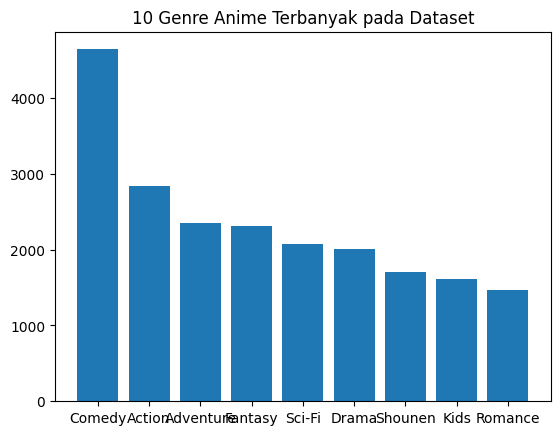

In [11]:
import matplotlib.pyplot as plt
genres = anime['genre'].str.split(', ', expand=True)

genre_counts = genres.stack().value_counts().reset_index()

genre_counts.columns = ['Genre', 'Jumlah']

genre_counts_sorted = genre_counts.sort_values(by='Jumlah', ascending = False).head(10)

print("10 Genre Anime Terbanyak pada Dataset :")
print(genre_counts_sorted)
plt.bar(genre_counts_sorted['Genre'][:9], genre_counts_sorted['Jumlah'][:9])
plt.title('10 Genre Anime Terbanyak pada Dataset')

Tipe Anime pada Dataset :
      Tipe  Jumlah
0       TV    3787
1      OVA    3311
2    Movie    2348
3  Special    1676
4      ONA     659
5    Music     488


Text(0.5, 1.0, 'Tipe Anime pada Dataset')

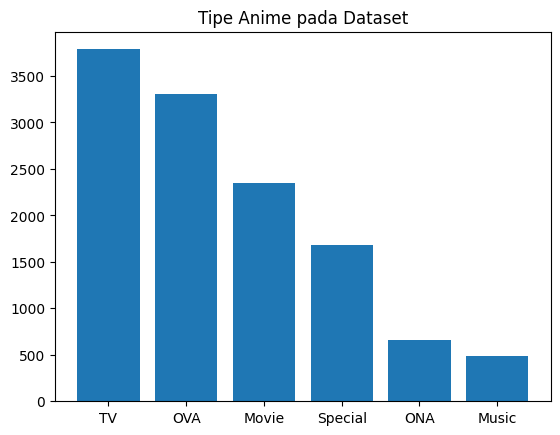

In [13]:
import matplotlib.pyplot as plt
tipe = anime['type']

tipe_counts = tipe.value_counts().reset_index()

tipe_counts.columns = ['Tipe', 'Jumlah']

tipe_counts_sorted = tipe_counts.sort_values(by='Jumlah', ascending = False)

print("Tipe Anime pada Dataset :")
print(tipe_counts_sorted)
plt.bar(tipe_counts_sorted['Tipe'], tipe_counts_sorted['Jumlah'])
plt.title('Tipe Anime pada Dataset')

In [20]:
import matplotlib.pyplot as plt

member_counts = pd.DataFrame({
    'Anime': anime["name"].tolist(),
    'Member': anime["members"].tolist(),
})


member_counts_sorted = member_counts.sort_values(by='Member', ascending = False).head(5)

print("5 Anime dengan Pengikut Terbanyak pada Dataset :")
print(member_counts_sorted)

5 Anime dengan Pengikut Terbanyak pada Dataset :
                                Anime   Member
40                         Death Note  1013917
86                 Shingeki no Kyojin   896229
804                  Sword Art Online   893100
1    Fullmetal Alchemist: Brotherhood   793665
159                      Angel Beats!   717796


Dari analisis data kategori, dapat diketahui bahwa :
- Genre anime paling banyak adalah genre comedy dengan jumlah 4645 data. Kemudian menyusul oleh genre action dan adventure

- Mayoritas dari anime pada dataset termasuk tipe yang tayang pada televisi (TV) ataupun OVA.

- Anime yang memiliki pengikut pengguna paling banyak pada website myanimelist.net adalah Death Note.


#### Data Numerik

Text(0, 0.5, 'Count')

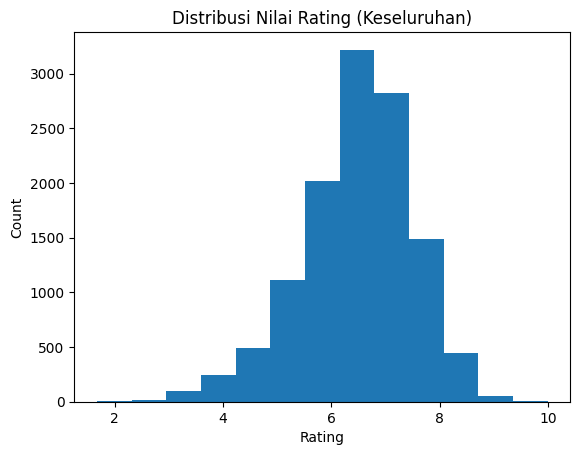

In [48]:
import matplotlib.pyplot as plt

plt.hist(anime['rating'], bins = 13)
plt.title('Distribusi Nilai Rating (Keseluruhan)')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

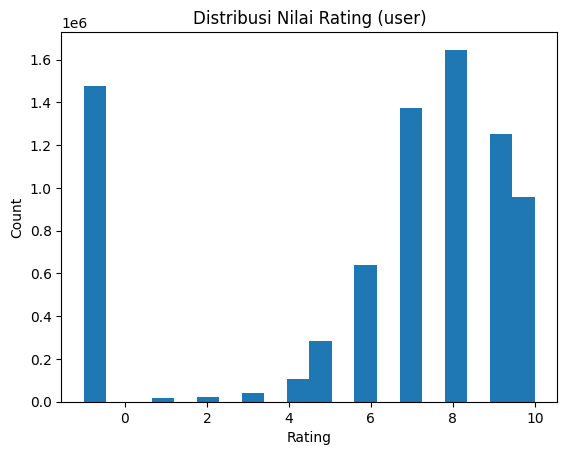

In [51]:
plt.hist(rating['rating'], bins = 20)
plt.title('Distribusi Nilai Rating (user)')
plt.xlabel('Rating')
plt.ylabel('Count')

Dari analisis data numerik, dapat diketahui bahwa :
- Pada rating keseluruhan anime, mayoritas anime memiliki rating pada nilai 7 hingga 8.

- Pada rating yang diberikan oleh user, mayoritas pengguna memberikan rating sebesar 8, dengan banyak juga memberikan nilai 7 dan 9. Terlihat banyak juga pengguna yang tidak memberi rating yang ditandai oleh nilai -1. Hal ini akan dapat mempengaruhi model dan perlu dilakukan penindakan pada fitur rating pengguna ini.

## Data Pre-Processing

### Data Duplikat

Pada dataset, ditemukan 1 data duplikat pada data rating user. Data tersebut akan di-drop dari dataset.

In [21]:
anime.duplicated().sum()

0

In [22]:
rating.duplicated().sum()

1

In [23]:
rating.drop_duplicates(inplace=True)
rating.duplicated().sum()

0

### Data Hilang (Missing Value)

Pada dataset ditemukan 317 data yang hilang pada data anime. Data tersebut akan di-drop dari dataset.

In [24]:
anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [25]:
anime.dropna(axis = 0, inplace = True)
anime.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [26]:
rating.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [27]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


### Data Cleaning

Terdapat beberapa hal yang spesfik pada dataset ini yang perlu di-drop atau diubah value nya agar dapat diproses menjadi sistem rekomendasi

#### Rating User

Terdapat banyaknya pengguna yang tidak memberikan rating (bernilai -1) pada suatu anime. Hal ini dapat berpengaruh pada sistem rekomendasi nantinya bila bergantung pada rating user. Sehingga data yang memiliki rating -1 akan di-drop dari dataset.


Pengguna juga akan difilter berdasarkan jumlah rating yang telah mereka berikan untuk dapat sebagai acuan rekomendasi sistem. Pengguna yang memberikan rating yang sedikit memiliki informasi yang kecil mengenai preferensi mereka. Hal ini dapat berpengaruh pada sistem. Diatur batas sebanyak minimum 50 rating agar pengguna dianggap representatif pada dataset.

In [28]:
import numpy as np
rating.rename(columns={"rating": "user_rating"}, inplace=True)
rating["user_rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
rating.dropna(axis = 0, inplace = True)

In [29]:
selected_users = rating["user_id"].value_counts()
rating = rating[rating["user_id"].isin(selected_users[selected_users >= 50].index)]

In [30]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696059 entries, 156 to 7813734
Data columns (total 3 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   anime_id     int64  
 2   user_rating  float64
dtypes: float64(1), int64(2)
memory usage: 173.8 MB


#### Teks

Terdapat banyaknya teks error pada judul anime yang memiliki karakter jepang atau karakter lainnya. Hal ini perlu diperbaiki dengan menghapus atau mengganti teks error tersebut.

Terdapat juga beberapa nama genre yang memiliki spasi atau tanda hubung yang dapat terpisah ketika proses pembuatan TF-IDF nantinya. Hal ini diperbaiki dengan mengganti spasi atau tanda hubung dengan garis bawah (underscore)

In [31]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)

    return text

anime["name"] = anime["name"].apply(text_cleaning)

In [32]:
anime['genre'] = anime['genre'].str.replace('Sci-Fi', 'Sci_Fi')
anime['genre'] = anime['genre'].str.replace('Shoujo Ai', 'Shoujo_Ai')
anime['genre'] = anime['genre'].str.replace('Shounen Ai', 'Shounen_Ai')
anime['genre'] = anime['genre'].str.replace('Slice of Life', 'Slice_of_Life')
anime['genre'] = anime['genre'].str.replace('Martial Arts', 'Martial_Arts')

### Penggabungan Dataset

Data anime dengan data rating pengguna digabungkan agar dapat digunakan untuk sistem rekomendasi.

In [33]:
dataset = pd.merge(anime,rating,on="anime_id")
dataset.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10.0


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5695965 entries, 0 to 5695964
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   anime_id     int64  
 1   name         object 
 2   genre        object 
 3   type         object 
 4   episodes     object 
 5   rating       float64
 6   members      int64  
 7   user_id      int64  
 8   user_rating  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 434.6+ MB


In [47]:
canime = dataset['name'].nunique()
cuser = dataset['user_id'].nunique()
print(f'Jumlah Anime : {canime}')
print(f'Jumlah User : {cuser}')

Jumlah Anime : 9869
Jumlah User : 32967


Setelah melakukan pre-proses data, jumlah anime yang tercatat pada dataset berkurang menjadi 9869, dan jumlah pengguna menjadi 32967.

Hasil gabungan data dari file anime.csv dan rating.csv menghasilkan dataset yang mencantumkan informasi mengenai anime serta rating pengguna pada satu dataset. Dataset memiliki 9 kolom data yang dimana tidak semua fitur data akan digunakan. Reduksi fitur akan dilakukan mengikuti kebutuhan model yang dibuat pada bagian selanjutnya.

## Pembuatan Model

Model yang dibuat pada proyek ini adalah model *content-based filtering* menggunakan *cosine similiarity* serta model *collaborative filtering* menggunakan K-Nearest Neighbor (KNN)

### Content-Based Filtering

*Content-based filtering* merupakan metode sistem rekomendasi yang merekomendasikan berdasarkan informasi objek dan profil pengguna. Dimana ketika pengguna menyukai suatu objek, sistem akan merekomendasikan objek yang memiliki karakteristik yang mirip terhadap objek yang disukai tersebut.

Model yang dibuat akan memanfaatkan *cosine similiarity*, yaitu metrik yang mengukur seberapa mirip dua objek. Dimana objek dianggap sebagai vektor pada ruang berdimensi banyak.

Persamaan *cosine similiarity* dapat dijabarkan sebagai berikut :

$\text{cosine_similiarity}(a,b) = \frac{a \cdot b}{||{a}|| \cdot ||{b}|| }$

dimana a dan b adalah objek vektor yang ingin diketahui kemiripannya.

Data yang digunakan pada model ini adalah anime (id dan judulnya) serta genre dari anime tersebut. Target dari model adalah merekomendasikan anime berdasarkan kemiripan dari genre. Dibuat dataset baru untuk keperluan model yang mengambil informasi judul, id, dan genre anime dari dataset utama.

In [37]:
data_content = pd.DataFrame({
    'id': dataset["anime_id"].tolist(),
    'anime_name': dataset["name"].tolist(),
    'genre': dataset["genre"].tolist()
})
data_content.drop_duplicates(inplace=True)
data_content.head()

,id,anime_name,genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
1761,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
17874,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S..."
19002,9253,Steins;Gate,"Sci_Fi, Thriller"
33116,9969,Gintama,"Action, Comedy, Historical, Parody, Samurai, S..."


Model akan memanfaatkan *Term Frequency-Inverse Document Frequency* (TF-IDF) untuk melakukan pemrosesan teks yang menunjukan relevan kata dokumen dalam konteksnya.

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(data_content['genre'])

tf.get_feature_names_out()

array(['action', 'adventure', 'cars', 'comedy', 'dementia', 'demons',
       'drama', 'ecchi', 'fantasy', 'game', 'harem', 'hentai',
       'historical', 'horror', 'josei', 'kids', 'magic', 'martial_arts',
       'mecha', 'military', 'music', 'mystery', 'parody', 'police',
       'power', 'psychological', 'romance', 'samurai', 'school', 'sci_fi',
       'seinen', 'shoujo', 'shoujo_ai', 'shounen', 'shounen_ai',
       'slice_of_life', 'space', 'sports', 'super', 'supernatural',
       'thriller', 'vampire', 'yaoi', 'yuri'], dtype=object)

Selanjutnya, fitur yang telah diekstrak ditransformasi menjadi matriks.

In [39]:
tfidf_matrix = tf.fit_transform(data_content['genre'])

tfidf_matrix.shape

(9874, 44)

Terdapat 9874 jumlah data dengan 44 jumlah genre anime yang selanjutnya dilakukan konversi matriks dalam bentuk padat (dense) untuk mereduksi penggunaan memori.

In [40]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29003238, 0.32039701, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.25311699, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Berikut matriks TF-IDF antara nama anime terhadap genre anime yang telah dibuat. Matriks ini menunjukan korelasi antara judul anime dengan genre anime.

In [41]:
 pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data_content.anime_name
).sample(22, axis=1).sample(10, axis=0)

,magic,ecchi,josei,mecha,kids,dementia,drama,shounen,horror,psychological,...,slice_of_life,power,super,school,mystery,shoujo_ai,music,adventure,yuri,shoujo
anime_name,,,,,,,,,,,,,,,,,,,,,
G.U. Trilogy,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.496757,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.454754,0.0,0.0
Mazinger Z tai Ankoku Daishougun,0.0,0.0,0.0,0.679192,0.000000,0.0,0.0,0.565133,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
Pokemon XY,0.0,0.0,0.0,0.000000,0.588754,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.436807,0.0,0.0
Gintama: Jump Festa 2014 Special,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.305443,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
Submarine Super 99,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.424070,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.388213,0.0,0.0
Break Blade 2: Ketsubetsu no Michi,0.0,0.0,0.0,0.483791,0.000000,0.0,0.0,0.402546,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
Happy☆Lesson,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.48992,0.0,0.0,0.0,0.000000,0.0,0.0
Pikmin Short Movies,0.0,0.0,0.0,0.000000,0.797127,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0


Setelah dibuat matriks TF-IDF, model sistem rekomendasi dibuat dengan mengetahui kesamaan dari setiap anime dengan anime lainnya menggunakan *cosine similiarity*.

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.15407355, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15407355, 1.        , 0.18031434, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.18031434, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

Setelah dibentuk matriks *cosine similiarity* antara setiap anime, selanjutnya dibuat dalam bentuk dataframe agar lebih mudah diakses.

In [43]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data_content['anime_name'], columns=data_content['anime_name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9874, 9874)


anime_name,Yahari Ore no Seishun Love Comedy wa Machigatteiru. Zoku,Wagamama☆Fairy Mirumo de Pon!,Stringendo: Angel-tachi no Private Lesson,Fate/Prototype,Divergence Eve 2: Misaki Chronicles
anime_name,,,,,
Sono Kinisasete yo: My My Mai,0.127702,0.076428,0.0,0.282123,0.000000
Seishoujo Kantai Virgin Fleet,0.286405,0.289855,0.0,0.148701,0.454608
Anata wo Zutto Aishiteru,0.000000,0.473825,0.0,0.000000,0.185786
Usagi Drop Specials,0.000000,0.000000,0.0,0.000000,0.000000
Maburaho,0.625464,0.537986,0.0,0.339978,0.104554
Ooyasan wa Shishunki!,0.180281,0.107896,0.0,0.000000,0.000000
Hoozuki no Reitetsu,0.146989,0.250996,0.0,0.529400,0.000000
Ange Vierge,0.303006,0.663044,0.0,0.453824,0.132766
Koi to Senkyo to Chocolate Special,0.935323,0.559781,0.0,0.229948,0.178721


Untuk mendapatkan rekomendasi dari model, dibuat fungsi rekomendasi yang menerima input berupa judul anime dan menghasilkan output rekomendasi judul anime dengan genre sejenis.

Fungsi ini mengambil informasi dari data *cosine similiarity* yang dibuat sebelumnya dan mengambil anime dengan kesamaan (bobot) yang paling mirip dengan input.

In [44]:
def anime_recommendations(nama_anime, similarity_data=cosine_sim_df, items=data_content[['anime_name', 'genre']], k=10):

    index = similarity_data.loc[:,nama_anime].to_numpy().argpartition(
        range(-1, -k, -1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    closest = closest.drop(nama_anime, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Berikut kode yang menguji fungsi rekomendasi dari suatu judul anime.

In [35]:
anime[anime.name.eq('Tokyo Ghoul')]

,anime_id,name,genre,type,episodes,rating,members
449,22319,Tokyo Ghoul,"Action, Drama, Horror, Mystery, Psychological,...",TV,12,8.07,618056


In [53]:
anime_recommendations('Tokyo Ghoul')

,anime_name,genre
0,Tokyo Ghoul √A,"Action, Drama, Horror, Mystery, Psychological,..."
1,Tokyo Ghoul: Pinto,"Action, Drama, Horror, Mystery, Psychological,..."
2,Night Head Genesis,"Drama, Horror, Mystery, Psychological, Superna..."
3,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,..."
4,Umineko no Naku Koro ni,"Horror, Mystery, Psychological, Supernatural"
5,Jigoku Shoujo,"Horror, Mystery, Psychological, Supernatural"
6,Jigoku Shoujo Futakomori,"Horror, Mystery, Psychological, Supernatural"
7,Ajin,"Action, Horror, Mystery, Seinen, Supernatural"
8,Ajin Part 3: Shougeki,"Action, Horror, Mystery, Seinen, Supernatural"
9,Ajin Part 2: Shoutotsu,"Action, Horror, Mystery, Seinen, Supernatural"


Model dapat merekomendasikan 10 judul anime dengan genre yang mendekati judul yang diberikan. Seluruh rekomendasi memiliki beberapa atau salah satu genre dari input.

Terdapat juga dari rekomendasi adalah judul pada satu series atau sekuel yang seharusnya memiliki genre yang mirip dengan judul input. Hal ini menunjukan sistem telah dapat memberikan rekomendasi yang baik.

### Collaborative Filtering

*Collaborative Filtering* adalah metode dalam membuat sistem rekomendasi yang memanfaatkan informasi dari pengguna lain yang memiliki preferensi yang mirip. Model yang dibuat adalah *Item-based collaborative filtering* yang menunjukan kesamaan dari objek berdasarkan rating sekelompok pengguna.

Model yang dibuat akan memanfaatkan algoritma *K-Nearest Neighbor* (KNN) yang melakukan prediksi dengan mencari tetangga dari objek berdasarkan kesamaan fitur.

Metrik jarak yang digunakan pada model KNN kali ini menggunakan *cosine similiarity* untukk mengetahui kesamaan dari setiap objek.

Pertama, dilakukan import pustaka yang akan digunakan.

In [54]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

Selanjutnya adalah membuat pivot table. Pivot table adalah teknik analisis data untuk merangkum dan meringkas data. Tabel yang dibuat meringkas judul anime dengan pengguna berdasarkan rating yang pengguna berikan.

Tabel ini yang selanjutnya menjadi data yang diproses oleh model.

In [55]:
data_pivot = dataset.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
data_pivot

user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009 Re:Cyborg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1: RandB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xxxHOLiC Kei,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,8.0,0.0,9.0,0.0,0.0
xxxHOLiC Movie: Manatsu no Yoru no Yume,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,9.0,0.0,0.0
xxxHOLiC Rou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0


Tabel pivot yang dibuat selanjutnya ditransformasi menjadi matriks *sparse* untuk mengkompresi data agar lebih efisien. Hal ini dikarenakan terdapat banyaknya elemen nol (anime yang tidak dirating oleh pengguna) pada tabel pivot.

Selanjutnya adalah pembuatan model KNN dengan metrik *cosine* untuk mengettahui kesamaan antar objek dan algoritma *brute* yang merupakan pendekatan dengan memeriksa seluruh kemungkinan solusi di dataset.

In [56]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

data_matrix = csr_matrix(data_pivot.values)

model_knn = NearestNeighbors(metric = "cosine", algorithm = "brute")
model_knn.fit(data_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

Dibuat fungsi yang dapat memberikan rekomendasi dari model KNN yang telah dibuat. Fungsi ini menerima input berupa judul anime yang oleh model akan dicari judul yang paling mendekati input berdasarkan rating pengguna.

Fungsi ini juga memberikan output berupa judul, rating, genre, serta nilai kesamaan dari anime yang direkomendasikan.

In [57]:
def get_anime_recommendations(anime, data_pivot = data_pivot, anime_data = anime):
  query_no = data_pivot.index.get_loc(anime)
  distances, indices = model_knn.kneighbors(data_pivot.iloc[query_no,:].values.reshape(1, -1), n_neighbors = 11)

  no = []
  name = []
  distance = []
  rating = []
  similarity = []
  genre = []

  for i in range(0, len(distances.flatten())):
      if i == 0:
          #continue
          print(f"Rekomendasi untuk Penonton {data_pivot.index[query_no]} :\n")
          print(f"Genre : {anime_data.loc[anime_data['name'] == anime, 'genre'].values} \n ")
          print(f"Rating : {anime_data.loc[anime_data['name'] == anime, 'rating'].values} ")
      else:
          no.append(i)
          name.append(data_pivot.index[indices.flatten()[i]])
          distance.append(distances.flatten()[i])
          rating.append(anime_data.loc[anime_data['name'] == data_pivot.index[indices.flatten()[i]], 'rating'].values)
          genre.append(anime_data.loc[anime_data['name'] == data_pivot.index[indices.flatten()[i]], 'genre'].values)
          similarity.append(1 - distances.flatten()[i])


  dic = {"No" : no, "Anime Name" : name, "Rating" : rating, "Genre" : genre, "Similarity": similarity}
  recommendation = pd.DataFrame(data = dic)
  recommendation.set_index("No", inplace = True)


  return recommendation

Kode untuk menguji fungsi rekomendasi adalah sebagai berikut :

In [58]:
anime_recommendations = get_anime_recommendations('Tokyo Ghoul')
anime_recommendations

Rekomendasi untuk Penonton Tokyo Ghoul :

Genre : ['Action, Drama, Horror, Mystery, Psychological, Seinen, Supernatural'] 
 
Rating : [8.07] 


,Anime Name,Rating,Genre,Similarity
No,,,,
1,Tokyo Ghoul √A,[7.52],"[Action, Drama, Horror, Mystery, Psychological...",0.806135
2,Shingeki no Kyojin,[8.54],"[Action, Drama, Fantasy, Shounen, Super Power]",0.683216
3,Akame ga Kill!,[7.84],"[Action, Adventure, Fantasy]",0.657593
4,No Game No Life,[8.47],"[Adventure, Comedy, Ecchi, Fantasy, Game, Supe...",0.656309
5,Noragami,[8.17],"[Action, Adventure, Shounen, Supernatural]",0.647329
6,Sword Art Online,[7.83],"[Action, Adventure, Fantasy, Game, Romance]",0.639222
7,Kiseijuu: Sei no Kakuritsu,[8.59],"[Action, Drama, Horror, Psychological, Sci-Fi,...",0.637769
8,Sword Art Online II,[7.35],"[Action, Adventure, Fantasy, Game, Romance]",0.610021
9,Mirai Nikki (TV),[8.07],"[Action, Mystery, Psychological, Shounen, Supe...",0.602482


Hasil yang didapatkan menunjukan rekomendasi yang diberikan oleh sistem. Rekomendasi yang diberikan menunjukan anime yang memiliki rating dan genre yang mendekati dengan judul input. Nilai kesamaan dari rekomendasi menunjukan hasil paling besar 0.8 atau 80% yaitu judul yang merupakan satu series / sekuel dengan judul input. Sedangkan rekomendasi lainnya memiliki rentang nilai kesamaan pada nilai 0.68 - 0.59. Hal ini dapat disebabkan karena beragamnya judul anime serta preferensi pengguna. Keefektifan model dapat diuji dengan menggunakan metrik evaluasi.

## Evaluasi

Evaluasi dilakukan untuk mengukur peforma model. Metrik yang akan digunakan adalah skor presisi dan *hit rate at k*.

### Presisi

Presisi adalah salah satu metrik evaluasi yang digunakan dalam mengevaluasi model seperti sistem rekomendasi. Presisi mengukur proporsi antara nilai tebakan yang benar dari semua hasil yang diprediksi. Pada sistem rekomendasi, presisi diukur dengan mengetahui proporsi antara rekomendasi yang relevan dengan seluruh rekomendasi yang diberikan.

Persamaan presisi dapat didefinisikan sebagai :
$\text{Presisi} = \frac{\text{Rekomendasi Relevan}}{\text{Seluruh Rekomendasi}}$

Untuk evaluasi ini, model merekomendasikan berdasarkan genre yang dimana setiap judul pada dataset memiliki jumlah genre yang berbeda. Sehingga diperlukan asumsi bahwa rekomendasi relevan adalah jika rekomendasi memiliki setengah atau lebih genre yang dimiliki oleh judul input.

In [45]:
print(anime.loc[anime['name'] == 'Tokyo Ghoul','genre'].values)
anime_recommendations('Tokyo Ghoul')

['Action, Drama, Horror, Mystery, Psychological, Seinen, Supernatural']


,anime_name,genre
0,Tokyo Ghoul √A,"Action, Drama, Horror, Mystery, Psychological,..."
1,Tokyo Ghoul: Pinto,"Action, Drama, Horror, Mystery, Psychological,..."
2,Night Head Genesis,"Drama, Horror, Mystery, Psychological, Superna..."
3,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,..."
4,Umineko no Naku Koro ni,"Horror, Mystery, Psychological, Supernatural"
5,Jigoku Shoujo,"Horror, Mystery, Psychological, Supernatural"
6,Jigoku Shoujo Futakomori,"Horror, Mystery, Psychological, Supernatural"
7,Ajin,"Action, Horror, Mystery, Seinen, Supernatural"
8,Ajin Part 3: Shougeki,"Action, Horror, Mystery, Seinen, Supernatural"
9,Ajin Part 2: Shoutotsu,"Action, Horror, Mystery, Seinen, Supernatural"


Dari hasil yang diberikan, ditunjukan bahwa seluruh rekomendasi yang diberikan memiliki 4 atau lebih dari 7 genre yang dimiliki oleh judul input. Hal ini menandakan bahwa nilai presisi dari sistem adalah 10/10 atau 100%.

### Hit Rate at K

*Hit rate at K* adalah metrik yang digunakan untuk mengevaluasi sistem rekomendasi dalam memprediksi objek yang benar disukai oleh pengguna dari sebanyak k objek yang direkomendasikan.

Metrik ini berfokus pada apakah rekomendasi memberikan objek yang relevan pada preferensi pengguna. Hal ini didapatkan dengan membandingkan daftar objek yang benar-benar disukai pengguna dengan rekomendasi yang diberikan sistem. Apabila terdapat objek yang disukai pengguna pada rekomendasi, maka *hit* dihitung sebagai 1.  Hal ini dilakukan untuk pengguna lainnya.

*Hit rate at K* dihitung sebagai berikut :

$\text{Hit rate at K} = \frac{\text{Jumlah Hit}}{\text{jumlah user}}$


Untuk evaluasi ini, daftar judul anime yang pengguna sukai didapatkan dari 10 anime yang memiliki rating terbesar. Daftar ini kemudian akan dibandingkan pada rekomendasi oleh sistem. Apabila rekomendasi terdapat pada daftar pengguna, terhitung *hit* sebagai 1.

Evaluasi dilakukan pada 10 ribu pengguna akibat keterbatasan memori.

In [138]:
def hit_rate_at_k(user_ratings):
    total_hits = 0
    list_user = dataset['user_id'].unique().tolist()

    for user_id in list_user[:10000]:
        user_ratings = dataset[dataset['user_id'] == user_id]
        sorted_ratings = user_ratings.sort_values(by='rating', ascending=False)
        top_rated_anime = sorted_ratings.head(11)['name'].tolist()

        recommendations = get_anime_recommendations(top_rated_anime[0])
        top_recommendations = recommendations['Anime Name']
        for item in top_recommendations:
            if item in top_rated_anime[1:]:
                total_hits += 1
                break

    hit_rate = (total_hits / len(list_user[:10000])) * 100
    return hit_rate

hit_rate = hit_rate_at_k(rating)
print("Hit Rate at K:", hit_rate)

Hit Rate at K: 95.03


Dari fungsi model *collaborative filtering* yang dibuat, telah dilakukan perhitungan *hit rate at* 10. Dimana rekomendasi yang diuji adalah 10 rekomendasi yang diberikan sistem. Hasil yang didapatkan adalah 95.03% *hit rate*. Hal ini menunjukan bahwa terdapat 95.03% kemungkinan bahwa terdapat setidaknya satu item yang disukai oleh pengguna dari rekomendasi sistem.